# Impulse Response Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)
n_samples = 100
time_index = pd.date_range(start='1/1/2020', periods=n_samples, freq='D')
temperature = np.sin(np.linspace(0, 3 * np.pi, n_samples)) + np.random.normal(0, 0.5, n_samples)
demand = np.sin(np.linspace(0, 2 * np.pi, n_samples) + np.pi/4) + np.random.normal(0, 0.5, n_samples)
price = 0.5 * temperature + 0.3 * demand + np.random.normal(0, 0.2, n_samples)

# Create a DataFrame
data = pd.DataFrame({'Temperature': temperature, 'Demand': demand, 'Price': price}, index=time_index)

# Display the first few rows
data.head()


,Temperature,Demand,Price
2020-01-01,0.882026,1.648682,0.861781
2020-01-02,0.295135,0.076651,0.122687
2020-01-03,0.678620,0.155690,0.605949
2020-01-04,1.402179,1.312848,1.225997
2020-01-05,1.305441,0.275470,0.863388


In [2]:
from statsmodels.tsa.api import VAR

# Fit a VAR model
model = VAR(data)
results = model.fit(maxlags=15, ic='aic')

# Print summary of the model
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, May, 2024
Time:                     16:52:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.37999
Nobs:                     85.0000    HQIC:                  -3.75059
Log likelihood:           3.36325    FPE:                 0.00702795
AIC:                     -5.34571    Det(Omega_mle):      0.00191987
--------------------------------------------------------------------
Results for equation Temperature
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.057815         0.098729           -0.586           0.558
L1.Temperature          0.468560         0.316156            1.482           0.138
L1.Demand               0.067502         0.267

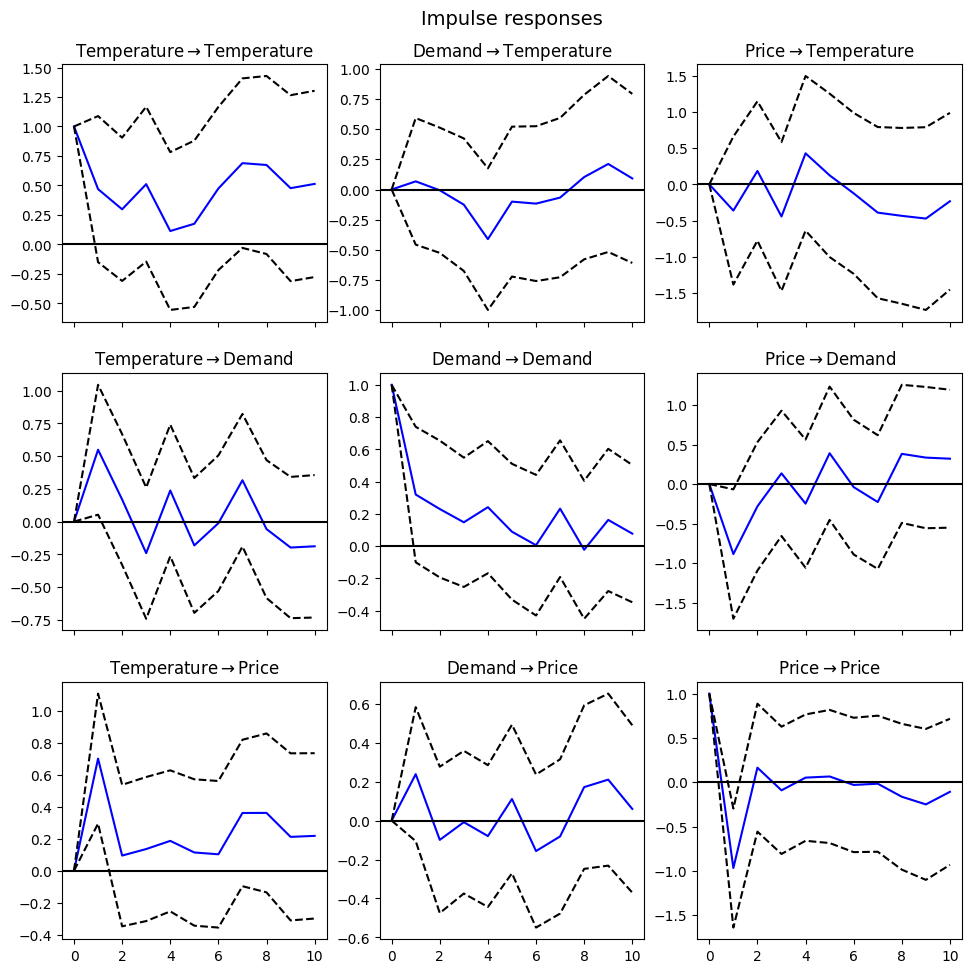

In [3]:
# Compute IRFs
irf = results.irf(10)  # Compute IRFs for 10 periods ahead

# Plot IRFs
irf.plot(orth=False)
plt.show()
